In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats


####  `Import claims_data.csv and cust_data.csv which is provided to you and  combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.`


In [2]:
claim=pd.read_csv('claims.csv')

In [3]:
demographies = pd.read_csv('cust_demographics.csv')

In [4]:
cust_details=pd.merge(claim,demographies,how='inner',left_on=claim.customer_id,right_on=demographies.CUST_ID)

In [5]:
cust_details

,key_0,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,30308357,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
4,47830476,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


#### `2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance`

In [6]:
cust_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   key_0                1085 non-null   int64  
 1   claim_id             1085 non-null   int64  
 2   customer_id          1085 non-null   int64  
 3   incident_cause       1085 non-null   object 
 4   claim_date           1085 non-null   object 
 5   claim_area           1085 non-null   object 
 6   police_report        1085 non-null   object 
 7   claim_type           1085 non-null   object 
 8   claim_amount         1020 non-null   object 
 9   total_policy_claims  1075 non-null   float64
 10  fraudulent           1085 non-null   object 
 11  CUST_ID              1085 non-null   int64  
 12  gender               1085 non-null   object 
 13  DateOfBirth          1085 non-null   object 
 14  State                1085 non-null   object 
 15  Contact              1085 non-null   o

In [7]:
cust_details['claim_date']=pd.to_datetime(cust_details.claim_date,format='%m/%d/%Y')

In [8]:
cust_details['DateOfBirth']=pd.to_datetime(cust_details.DateOfBirth,format='%d-%b-%y')

#### ` Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the  $ ` `sign`.

In [9]:
cust_details['claim_amount']=cust_details.claim_amount.str.replace('$','',regex=True).astype(float)

In [10]:
cust_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   key_0                1085 non-null   int64         
 1   claim_id             1085 non-null   int64         
 2   customer_id          1085 non-null   int64         
 3   incident_cause       1085 non-null   object        
 4   claim_date           1085 non-null   datetime64[ns]
 5   claim_area           1085 non-null   object        
 6   police_report        1085 non-null   object        
 7   claim_type           1085 non-null   object        
 8   claim_amount         1020 non-null   float64       
 9   total_policy_claims  1075 non-null   float64       
 10  fraudulent           1085 non-null   object        
 11  CUST_ID              1085 non-null   int64         
 12  gender               1085 non-null   object        
 13  DateOfBirth          1085 non-nul

#### `Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.`

In [120]:
cust_details.loc[cust_details.claim_type=='Injury only','police_report']=np.where(cust_details.loc[cust_details.claim_type=='Injury only','police_report']=='No',0,1)

In [121]:
injury_claims=cust_details.loc[cust_details.claim_type=='Injury only','police_report']

In [122]:
injury_claims

8       0
18      1
21      0
22      0
23      1
       ..
1062    0
1064    1
1072    1
1074    1
1082    1
Name: police_report, Length: 193, dtype: object

In [126]:
cust_details

,key_0,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Age,Age_category,month_name
0,21868593,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,44.0,Adult,Nov
1,75740424,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,53.0,Adult,Oct
2,30308357,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver,39.0,Adult,Feb
4,47830476,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,37.0,Adult,Jun
6,19269962,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,46.0,Adult,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,42.0,Adult,Sep
1081,42364152,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,42364152,Female,1996-07-07,ID,529-462-1635,Silver,27.0,Youth,May
1082,19888166,22690595,19888166,Other driver error,2017-05-15,Auto,1,Injury only,33080.0,2.0,No,19888166,Male,1990-04-11,WI,712-651-9613,Gold,33.0,Adult,May
1083,11256802,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,11256802,Female,1864-10-22,LA,469-345-5617,Silver,59.0,Adult,Apr


#### `One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.`


In [15]:
cust_details.drop_duplicates('customer_id',inplace=True)

###  `Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)`

In [16]:
cust_details.isna().sum()

key_0                   0
claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
dtype: int64

In [17]:
def missing_values(x):
    if ((x.dtype=='int64')|(x.dtype=='float64')):
            x[x=='NaN']=np.nan
            x=x.fillna(x.mean())
            
    else:
        x=x.fillna(x.mode())
            
    return x

In [18]:
cust_details=cust_details.apply(missing_values)

In [19]:
cust_details.isna().sum()

key_0                  0
claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
dtype: int64

### Calculate the age of customers in years. Based on the age, categorize thecustomers according to the below criteria

#### Children < 18
#### Youth 18-30
#### Adult 30-60
#### Senior > 60

In [20]:
cust_details.DateOfBirth

0      1979-01-12
1      1970-01-13
2      1984-03-11
4      1986-05-01
6      1977-05-13
          ...    
1080   1981-03-15
1081   1996-07-07
1082   1990-04-11
1083   2064-10-22
1084   1995-07-12
Name: DateOfBirth, Length: 1078, dtype: datetime64[ns]

In [92]:
today=pd.Timestamp.now()

In [93]:
diff=today-cust_details.DateOfBirth

In [94]:
cust_details['Age']=round(diff.dt.days/365.25,0)

In [95]:
cust_details.loc[1083,'DateOfBirth']=cust_details.loc[1083,'DateOfBirth']+pd.DateOffset(years=-100)

In [96]:
cust_details['Age_category']=np.where(cust_details.Age>60,'Senior',np.where((cust_details.Age<60)&(cust_details.Age>30),'Adult',np.where((cust_details.Age<30)&(cust_details.Age>18),'Youth','Children')))

### `What is the average amount claimed by the customers from various segments`

In [26]:
cust_details.groupby('Segment')['claim_amount'].agg(['mean'])

,mean
Segment,
Gold,12756.479697
Platinum,12369.304648
Silver,12269.434851


### `What is the total claim amount based on incident cause for all the claimsthat have been done at least 20 days prior to 1st of October, 2018.`

In [27]:
cust_details[(cust_details.claim_date.between('2018-09-01','2018-09-20'))].groupby('incident_cause')['claim_amount'].agg(['sum'])

,sum
incident_cause,
Crime,5800.000000
Driver error,26861.000000
Natural causes,49649.998519
Other causes,233474.498519
Other driver error,123559.500000


### ` How many adults from TX, DE and AK claimed insurance for driver related issues and causes? `

In [28]:
adults_only=cust_details[(cust_details.Age_category=='Adult')&(cust_details.State=='AK')|(cust_details.State=='DE')|(cust_details.State=='TX')&(cust_details.incident_cause.str.contains('Drive'))]

In [29]:
adults_only.head(2)

,key_0,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Age,Age_category
39,26489135,70399158,26489135,Driver error,2017-07-01,Auto,No,Material only,1110.0,1.0,No,26489135,Male,1994-10-05,DE,654-456-1493,Platinum,29.0,Youth
56,94953428,97983922,94953428,Other causes,2017-06-18,Auto,No,Material only,2210.0,3.0,No,94953428,Female,1977-12-07,DE,671-517-9548,Gold,46.0,Adult


In [30]:
crosstab=pd.crosstab(adults_only.State,adults_only.incident_cause,adults_only.claim_amount,aggfunc='sum')

In [31]:
crosstab

incident_cause,Crime,Driver error,Natural causes,Other causes,Other driver error
State,,,,,
AK,NaN,75770.498519,NaN,61000.0,16790.498519
DE,34210.0,87090.998519,40120.0,113227.5,48837.498519
TX,NaN,87897.998519,NaN,NaN,NaN


### `Draw a pie chart between the aggregated value of claim amount based `
### `on gender and segment. Represent the claim amount as a percentage on the pie chart.`

In [32]:
cross_tab_gender = pd.crosstab(cust_details.gender,cust_details.Segment,cust_details.claim_amount,aggfunc='sum')

In [33]:
gold_pie=cross_tab_gender['Gold']

In [34]:
silver_pie=cross_tab_gender['Silver']

In [35]:
platinum_pie=cross_tab_gender['Platinum']

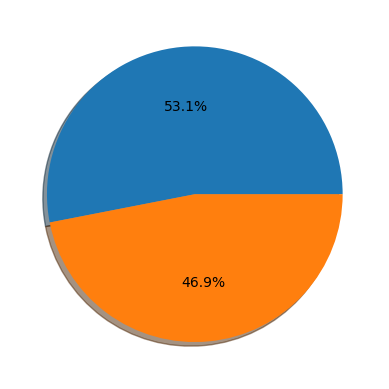

In [36]:
plt.subplot(1,2,1)
plt.pie(gold_pie,autopct='%1.1f%%',shadow=True)
plt.subplot(1,2,2)
plt.pie(silver_pie,autopct='%1.1f%%',shadow=True)
plt.subplot()
plt.pie(platinum_pie,autopct='%1.1f%%',shadow=True)
plt.show()

### `Among males and females, which gender had claimed the most for any `
### `type of driver related issues? E.g. This metric can be compared using a bar chart`


In [37]:
driver_errors=cust_details[cust_details.incident_cause.str.contains('Driver')|cust_details.incident_cause.str.contains('driver')]

In [38]:
gender_metric=driver_errors.groupby('gender')['claim_amount'].agg(['sum'])

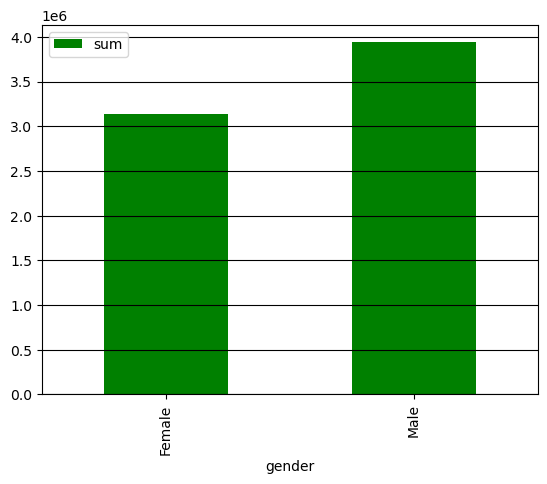

In [39]:
gender_metric.plot(kind='bar',color='g')
plt.grid(axis='y',color='k')
plt.show()

### ` Which age group had the maximum fraudulent policy claims? Visualize `
###  `it on a bar chart.`

In [40]:
fraudlent_cases=cust_details[cust_details.fraudulent=='Yes']

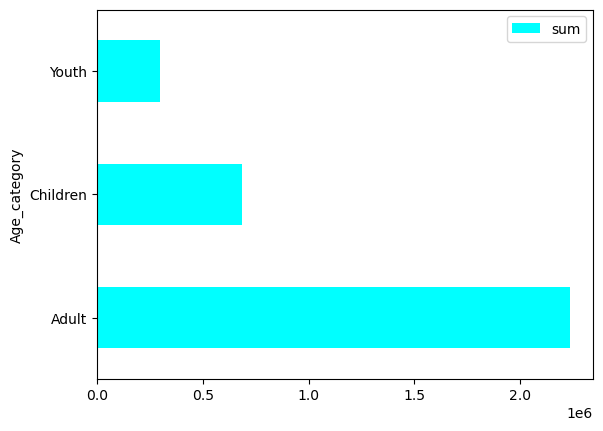

In [41]:
fraudlent_cases.groupby('Age_category')['claim_amount'].agg(['sum']).plot(kind='barh',color='Aqua')
plt.show()

### `Visualize the monthly trend of the total amount that has been claimed `
### `by the customers. Ensure that on the “month” axis, the month is in a `
### ` chronological order not alphabetical order. `

In [42]:
cust_details['month_name']=cust_details.claim_date.dt.strftime('%b')

In [43]:
monthly_trend=cust_details.groupby('month_name')['claim_amount'].agg(['sum'])

In [44]:
sort_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [45]:
monthly_trend.reset_index(inplace=True)

In [46]:
monthly_trend.index=pd.CategoricalIndex(monthly_trend['month_name'],categories=sort_order,ordered=True)

In [47]:
monthly_trend=monthly_trend.sort_index().set_index('month_name')

<AxesSubplot:xlabel='month_name'>

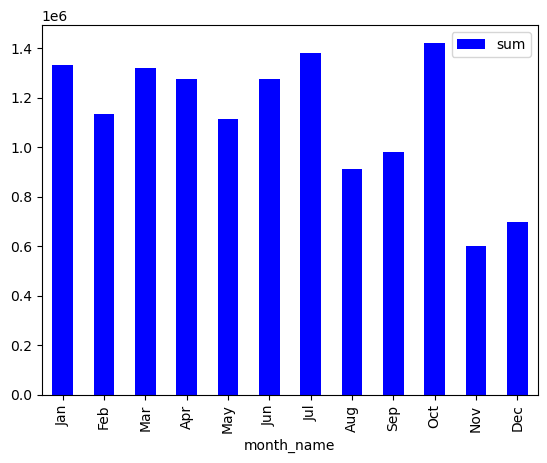

In [48]:
monthly_trend.plot(kind='bar',color='b')

## What is the average claim amount for gender and age categories and 
## suitably represent the above using a facetted bar chart, one facet that 
## represents fraudulent claims and the other for non-fraudulent claims

In [136]:
fraud_cases=cust_details[cust_details.fraudulent=='Yes']

In [138]:
Non_fraud_cases=cust_details[cust_details.fraudulent=='No']

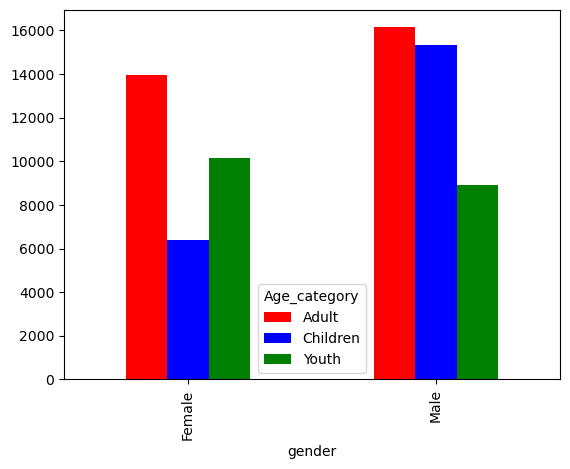

In [143]:
fraud_cases.groupby(['gender','Age_category'])['claim_amount'].mean().unstack().plot(kind='bar',color=['red','b','g'])
plt.show()

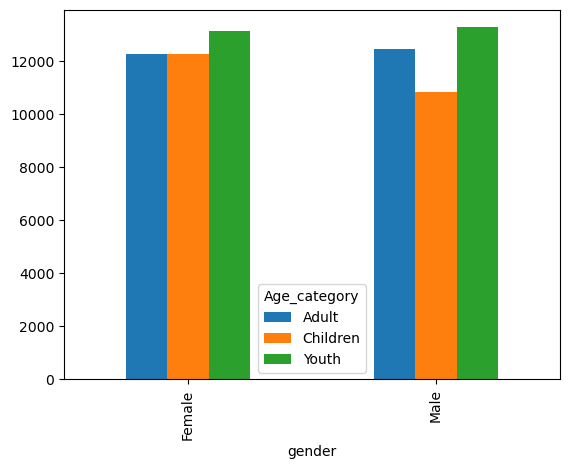

In [141]:
Non_fraud_cases.groupby(['gender','Age_category'])['claim_amount'].mean().unstack().plot(kind='bar')
plt.show()

# statistical Tests 
### confidence interval will be 95 percent whenver be taken hence alpha value will be 0.05

## `Is there any similarity in the amount claimed by males and females?`

In [55]:
female_amt=cust_details.loc[cust_details.gender=='Female','claim_amount']

In [57]:
male_amt=cust_details.loc[cust_details.gender=='Male','claim_amount']

## to check we have to do statistical test
### let us assume null hypothesis `H0` 
#### `H0` - there is no significant relationship between amount claimed by male and female.
#### `Ha` - there is significant relationship between amount claimed by male and female

In [67]:
stats.ttest_ind(female_amt,male_amt)

Ttest_indResult(statistic=-0.8848703612768547, pvalue=0.3764242430541366)

In [88]:
st.ttest_ind(female_amt,male_amt)

(-0.8848703612768547, 0.3764242430541366, 1076.0)

In [89]:
st.ttest_ind?

In [69]:
## here we take alpha value as 0.05 and p- value is probablity of getting null hypothesis is true as we assumed it .
 ## and right it is more than alpha value hence we can conclude that null hypothesis is true 

## Is there any relationship between age category and segment

## here we assume null hypothesis as
#### `H0`- there is no relationship between age_category and segment
#### `Ha`- there is a relationship between age_category and segment

### we assume null hypothesis as true and based on p- value we will jump to a conclusion whether to reject null 
### hypothesis or reject

In [75]:
cust_details.Segment.unique()

array(['Platinum', 'Silver', 'Gold'], dtype=object)

In [77]:
observed_frequencies=pd.crosstab(cust_details.Segment,cust_details.Age_category)

In [78]:
stats.chi2_contingency(observed_frequencies)

(0.6254271521325875,
 0.9601966716514191,
 4,
 array([[215.44155844,  95.67532468,  59.88311688],
        [209.63450835,  93.09647495,  58.2690167 ],
        [200.92393321,  89.22820037,  55.84786642]]))

In [79]:
observed_frequencies

Age_category,Adult,Children,Youth
Segment,,,
Gold,220,95,56
Platinum,209,93,59
Silver,197,90,59


In [80]:
stats.chi2_contingency?

## here we accept null hypothesis ,having p-value of 0.96 of null hypothesis to be true 

## `The current year has shown a significant rise in claim amounts as `
## `compared to 2016-17 fiscal average which was $10,000.`

### here we assume null hypothesis and alternative hypothesis 
### `H0` - there is no such rise in claim_amount in given_year
### `Ha` - there is a rise in claim_amount in given_year

In [83]:
stats.ttest_1samp(cust_details.claim_amount,10000)

Ttest_1sampResult(statistic=6.068796577191385, pvalue=1.7827316562159517e-09)

# assuming null hypothesis to be True 
### we are getting alpha(p-value) less than 0.05 and therefore we can say that there is no such evidence to make null hypothesis to be true 
## thus, we reject null hypothesis 

## `Is there any difference between age groups and insurance claims?`

## here we take null hypothesis 
## `H0`- there is no such difference between age_category and insurance claims
## `Ha`- there is such difference between age_category and insurenance claims

#### assuming null hypothesis to be True we take confidence interval of 95% and hence alpha value = 0.05

In [144]:
cust_details.Age_category.unique()

array(['Adult', 'Youth', 'Children'], dtype=object)

In [145]:
Adult=cust_details.loc[cust_details.Age_category=='Adult','claim_amount']

In [146]:
Youth=cust_details.loc[cust_details.Age_category=='Youth','claim_amount']

In [147]:
Children=cust_details.loc[cust_details.Age_category=='Children','claim_amount']

In [148]:
stats.f_oneway(Adult,Youth,Children)

F_onewayResult(statistic=1.822619365173407, pvalue=0.16210092317644595)

In [152]:
## here we are having p-value more than alpha value and it is probablity of getting "null hypothesis to be True "

### . Is there any relationship between total number of policy claims and the claimed amount?


In [116]:
cust_details.total_policy_claims.corr(cust_details.claim_amount)

-0.014291136186627376

## there is inverse relationship between total_number of policy claims and claim_amount